In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [63]:
# Parameters
domain = (-1, 1)  # Domain of the wave
L = domain[1] - domain[0]  # Length of the domain
Nx = 200  # Number of spatial points
Nt = 2000  # Number of time points
c = 1  # Wave speed
dx = L / Nx
dt = 0.001  # Smaller time step for stability
alpha = 50  # Gaussian width parameter
source_point = 0.0  # Position of the Gaussian source

# Spatial grid
x = np.linspace(*domain, Nx)

# Reinitialize the wave field without the initial velocity condition
u = np.zeros((Nt, Nx))
u[0, :] = np.exp(-alpha * (x - source_point)**2)  # Gaussian initial displacement, centered at x = 0.3

u[1, :] = u[0, :]  # No initial velocity

# Finite difference method with the modified initial conditions (no initial velocity)
for n in range(1, Nt - 1):
    for i in range(1, Nx - 1):
        u[n + 1, i] = 2*u[n, i] - u[n - 1, i] + (dt**2 * c**2) * (u[n, i - 1] - 2*u[n, i] + u[n, i + 1]) / dx**2

    # Neumann boundary conditions
    u[n + 1, 0] = u[n + 1, 1]
    u[n + 1, -1] = u[n + 1, -2]

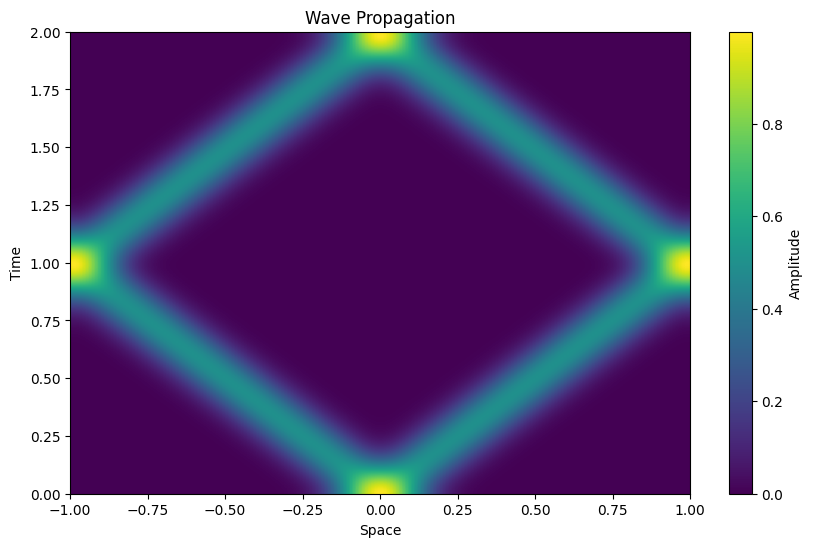

In [64]:

# Recreate the static plot with the modified initial conditions
plt.figure(figsize=(10, 6))
plt.imshow(u, extent=[*domain, Nt*dt, 0], aspect='auto', cmap='viridis')

plt.gca().invert_yaxis()

plt.title('Wave Propagation')
plt.xlabel('Space')
plt.ylabel('Time')
plt.colorbar(label='Amplitude')
plt.show()